In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Wine.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [10]:
x = data.iloc[:,[0,5]].values
x

array([[14.23,  2.8 ],
       [13.2 ,  2.65],
       [13.16,  2.8 ],
       [14.37,  3.85],
       [13.24,  2.8 ],
       [14.2 ,  3.27],
       [14.39,  2.5 ],
       [14.06,  2.6 ],
       [14.83,  2.8 ],
       [13.86,  2.98],
       [14.1 ,  2.95],
       [14.12,  2.2 ],
       [13.75,  2.6 ],
       [14.75,  3.1 ],
       [14.38,  3.3 ],
       [13.63,  2.85],
       [14.3 ,  2.8 ],
       [13.83,  2.95],
       [14.19,  3.3 ],
       [13.64,  2.7 ],
       [14.06,  3.  ],
       [12.93,  2.41],
       [13.71,  2.61],
       [12.85,  2.48],
       [13.5 ,  2.53],
       [13.05,  2.63],
       [13.39,  2.85],
       [13.3 ,  2.4 ],
       [13.87,  2.95],
       [14.02,  2.65],
       [13.73,  3.  ],
       [13.58,  2.86],
       [13.68,  2.42],
       [13.76,  2.95],
       [13.51,  2.35],
       [13.48,  2.7 ],
       [13.28,  2.6 ],
       [13.05,  2.45],
       [13.07,  2.4 ],
       [14.22,  3.  ],
       [13.56,  3.15],
       [13.41,  2.45],
       [13.88,  3.25],
       [13.

# KMeans Clustering

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


185.98307977528097
92.49019959473146
58.39831216953794
46.277132636807686
34.924513964544225
28.361867843915366
24.278590100074265
21.82596463610677
19.889234776620455
18.132693889540324


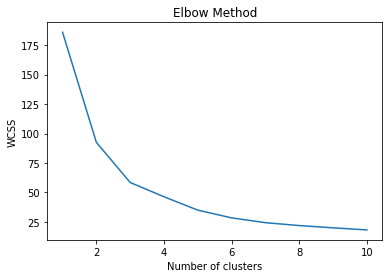

In [11]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
#k_means

kmeans = KMeans(n_clusters = 4,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x)
type(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 3, 0, 3,
       1, 0, 1, 0, 0, 1, 2, 1, 3, 0, 2, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 2, 3, 3,
       3, 3, 0, 3, 3, 3, 0, 0, 2, 0, 3, 3, 0, 1, 3, 3, 3, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 1])

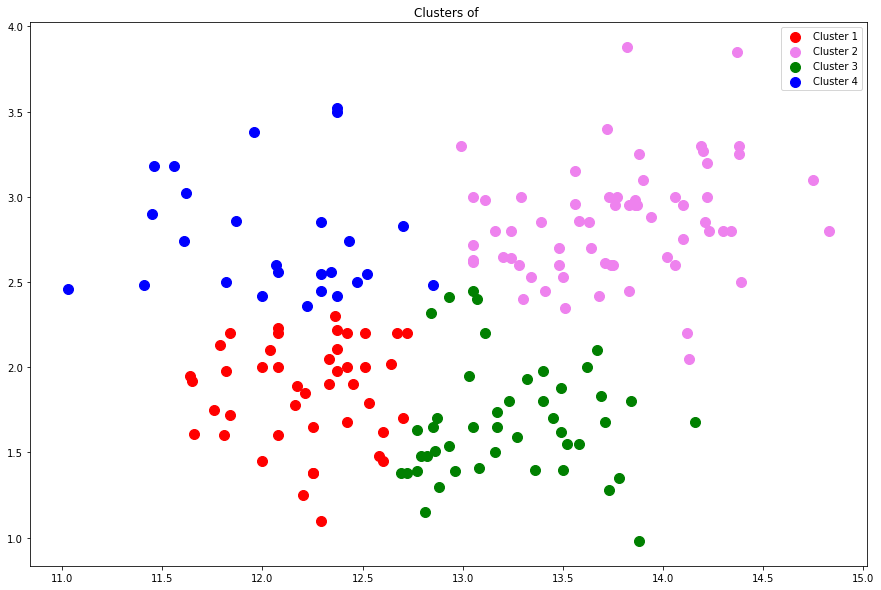

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s = 100, c = 'red',label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s = 100, c = 'violet',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s = 100, c = 'green',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],s = 100, c = 'blue',label = 'Cluster 4')
plt.title('Clusters of ')
plt.legend()
plt.show()

# PCA

In [42]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [43]:
# doing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(178, 4)

Text(0, 0.5, 'Second Principal Component')

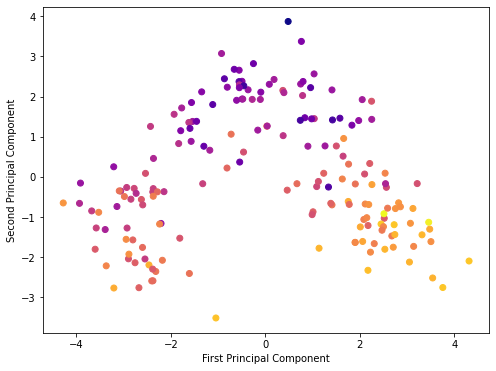

In [44]:
# plotting the PCA components
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = data['Alcohol'], cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')